### 알고리즘의 성능 분석
    - 실행 시간을 측정하는 방법
        *  실제 실행 시간을 측정
        * 실제로 구현 해야됨
        * 동일한 하드웨어에서 측정해야됨
    
    - 알고리즘의 복잡도를 분석하는 방법
        * 직접 구현하지 않고서도 수행 시간을 분석
        * 알고리즘이 수행하는 연산의 횟수를 측정하여 비교
        * 일반적으로 연산의 횟수는 n의 함수
        * 시간 복잡도 분석 : 수행 시간 분석
        * 공간 복잡도 분석 : 수행시 필요로 하는 메모리 공간 분석

(1) 실행시간 측정

In [ ]:
# 예시
import time

myBag = []
start = time.time()
myBag.append("축구공")

end = time.time()
print("실행시간 :", end - start)

실행시간 : 5.9604644775390625e-05


실행시간이 너무 작게 나오면 예를들어 1000번 실행한 시간을 1000으로 나누던지, 1000번 실행한 값으로 그냥 비교하는 등의 비교방법이 있음

In [ ]:
myBag = []
start = time.time()
for _ in range(1000):
    myBag.append("축구공")

end = time.time()
print("1000회 실행시간 :", end - start)

1000회 실행시간 : 0.00018858909606933594


### 삽입연산의 비교

In [ ]:
# 리스트의 맨 뒤에 삽입

myBag = []
start = time.time()
for _ in range(1000):
    myBag.append("축구공")

end = time.time()
print("뒤에 삽입 1000회 실행시간 :", end - start)

myBag = []
start = time.time()
for _ in range(1000):
    myBag.insert(0, "축구공")

end = time.time()
print("앞에 삽입 1000회 실행시간 :", end - start)

뒤에 삽입 1000회 실행시간 : 0.00017070770263671875
앞에 삽입 1000회 실행시간 : 0.00074005126953125


약 4.5배나 시간 차이가남.<br/>
맨 앞에 삽입할 시 내부의 모든 원소를 먼저 이동해야 삽입 가능해서 많이 느림

### $n^2$을 구하는 문제
* 3가지 알고리즘
    - 각 알고리즘이 수행하는 연산의 개수 계산
    - 단 for 루프 제어 연산은 고려하지 않음

In [ ]:
n = 3

In [ ]:
# A 연산
## 연산 횟수 : 대입연산 1회, 곱셈연산 1회
## 복잡도 TA(n) = 2
sum = 0 # 초기화

sum = n*n

In [ ]:
# B 연산
## 연산 횟수 : 대입연산 n+1회, 덧셈연산 n회
## 복잡도 TB(n) = 2n + 1
sum = 0 # 초기화

for i in range(n):
    sum += n

In [ ]:
# C 연산
## 연산 횟수 : 대입연산 n^2+n+1회, 덧셈연산 n^2회
## 복잡도 TC(n) = 2n^2 + n + 1
sum = 0 # 초기화

for i in range(n):
    for j in range(n):
        sum += 1

T(n)은 구하기 어렵고 비효율적이여서 빅오 표기법을 주로 사용함

### 빅오 표기법
* 점근적 표기법
* 차수가 가장 큰 항이 절대적인 영향
    - 다른 항들은 상대적으로 무시

ex) T(n) = $n^2$ + n + 1
* n=1    : $n^2$ 항의 영향 33.3%
* n=10   : $n^2$ 항의 영향 90%
* n=100  : $n^2$ 항의 영향 99%
* n=1000 : $n^2$ 항의 영향 99.9%

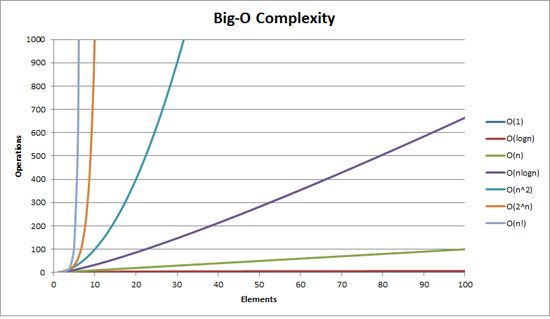

이외에도 빅오메가와 빅세타 표기법도 있음

### 최선, 평균, 최악의 경우
* 최악의 경우 : 수행 시간이 가장 늦은 경우

### 팩토리얼 구하기

In [1]:
def factorial(n):
    if n == 1: return 1
    else: return n * factorial(n-1)

factorial(3)

6

대부분의 순환은 반복으로 바구어 작성 가능

### 순환이 더 빠른 예: 거듭 제곱 계산
약 9배 이상 차이남

In [3]:
# 반복 구조
# 내부 반복문 : O(n)
def power_iter(x, n):
    result = 1.0
    for i in range(n):
        result = result * x
    return result

# 순환 구조
# O(log2(n))
# 문제의 크기가 거의 절반씩 줄어듬
def power(x, n):
    if n ==0: return 1
    elif n%2 == 0:
        return power(x*x, n//2)
    else:
        return x * power(x*x, (n-1)//2)

### 순환이 느린 예: 피보나치 수열
* 순환 구조에서는 같은 항이 중복해서 계산되어 비효율적.
* 시간복잡도가 O($2^n$)이나 된다.
* 반복 구조는 O(n)

In [ ]:
# 순환 구조
def fib(n):
    if n == 0: return 0
    elif n == 1: return 1
    else:
        return fib(n-1) + fib(n-2)

# 반복 구조
def fib_iter(n):
    if n<2: return n

    last = 0
    current = 1
    for i in range(2, n+1):
        tmp = current
        current += last
        last = tmp
    return current

### 하노이 탑 문제
O($2^n$)

In [4]:
# 순환을 이용
def hanoi_tower(n, fr, tmp, to):
    if n == 1:
        print(f"원판 1: {fr} --> {to}")
    else:
        hanoi_tower(n-1, fr, to, tmp)
        print(f"원판 {n}: {fr} --> {to}")
        hanoi_tower(n-1, tmp, fr, to)

In [6]:
hanoi_tower(3, "A", "B", "C")

원판 1: A --> C
원판 2: A --> B
원판 1: C --> B
원판 3: A --> C
원판 1: B --> A
원판 2: B --> C
원판 1: A --> C


백준 1914번으로 연습

In [18]:
# no.1914 하노이의 탑
N = int(input())

sol = []

def hanoi(n, fr, tmp, to):
    if n == 1:
        sol.append((fr, to))
    else:
        hanoi(n-1, fr, to, tmp)
        sol.append((fr, to))
        hanoi(n-1, tmp, fr, to)

if N > 20:
    print(2**N - 1)
else:
    hanoi(N, 1, 2, 3)
    print(len(sol))
    for x in sol:
        print(x[0], x[1])


3
7
1 3
1 2
3 2
1 3
2 1
2 3
1 3


In [14]:
2**21

2097152